In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import re
import polars as pl

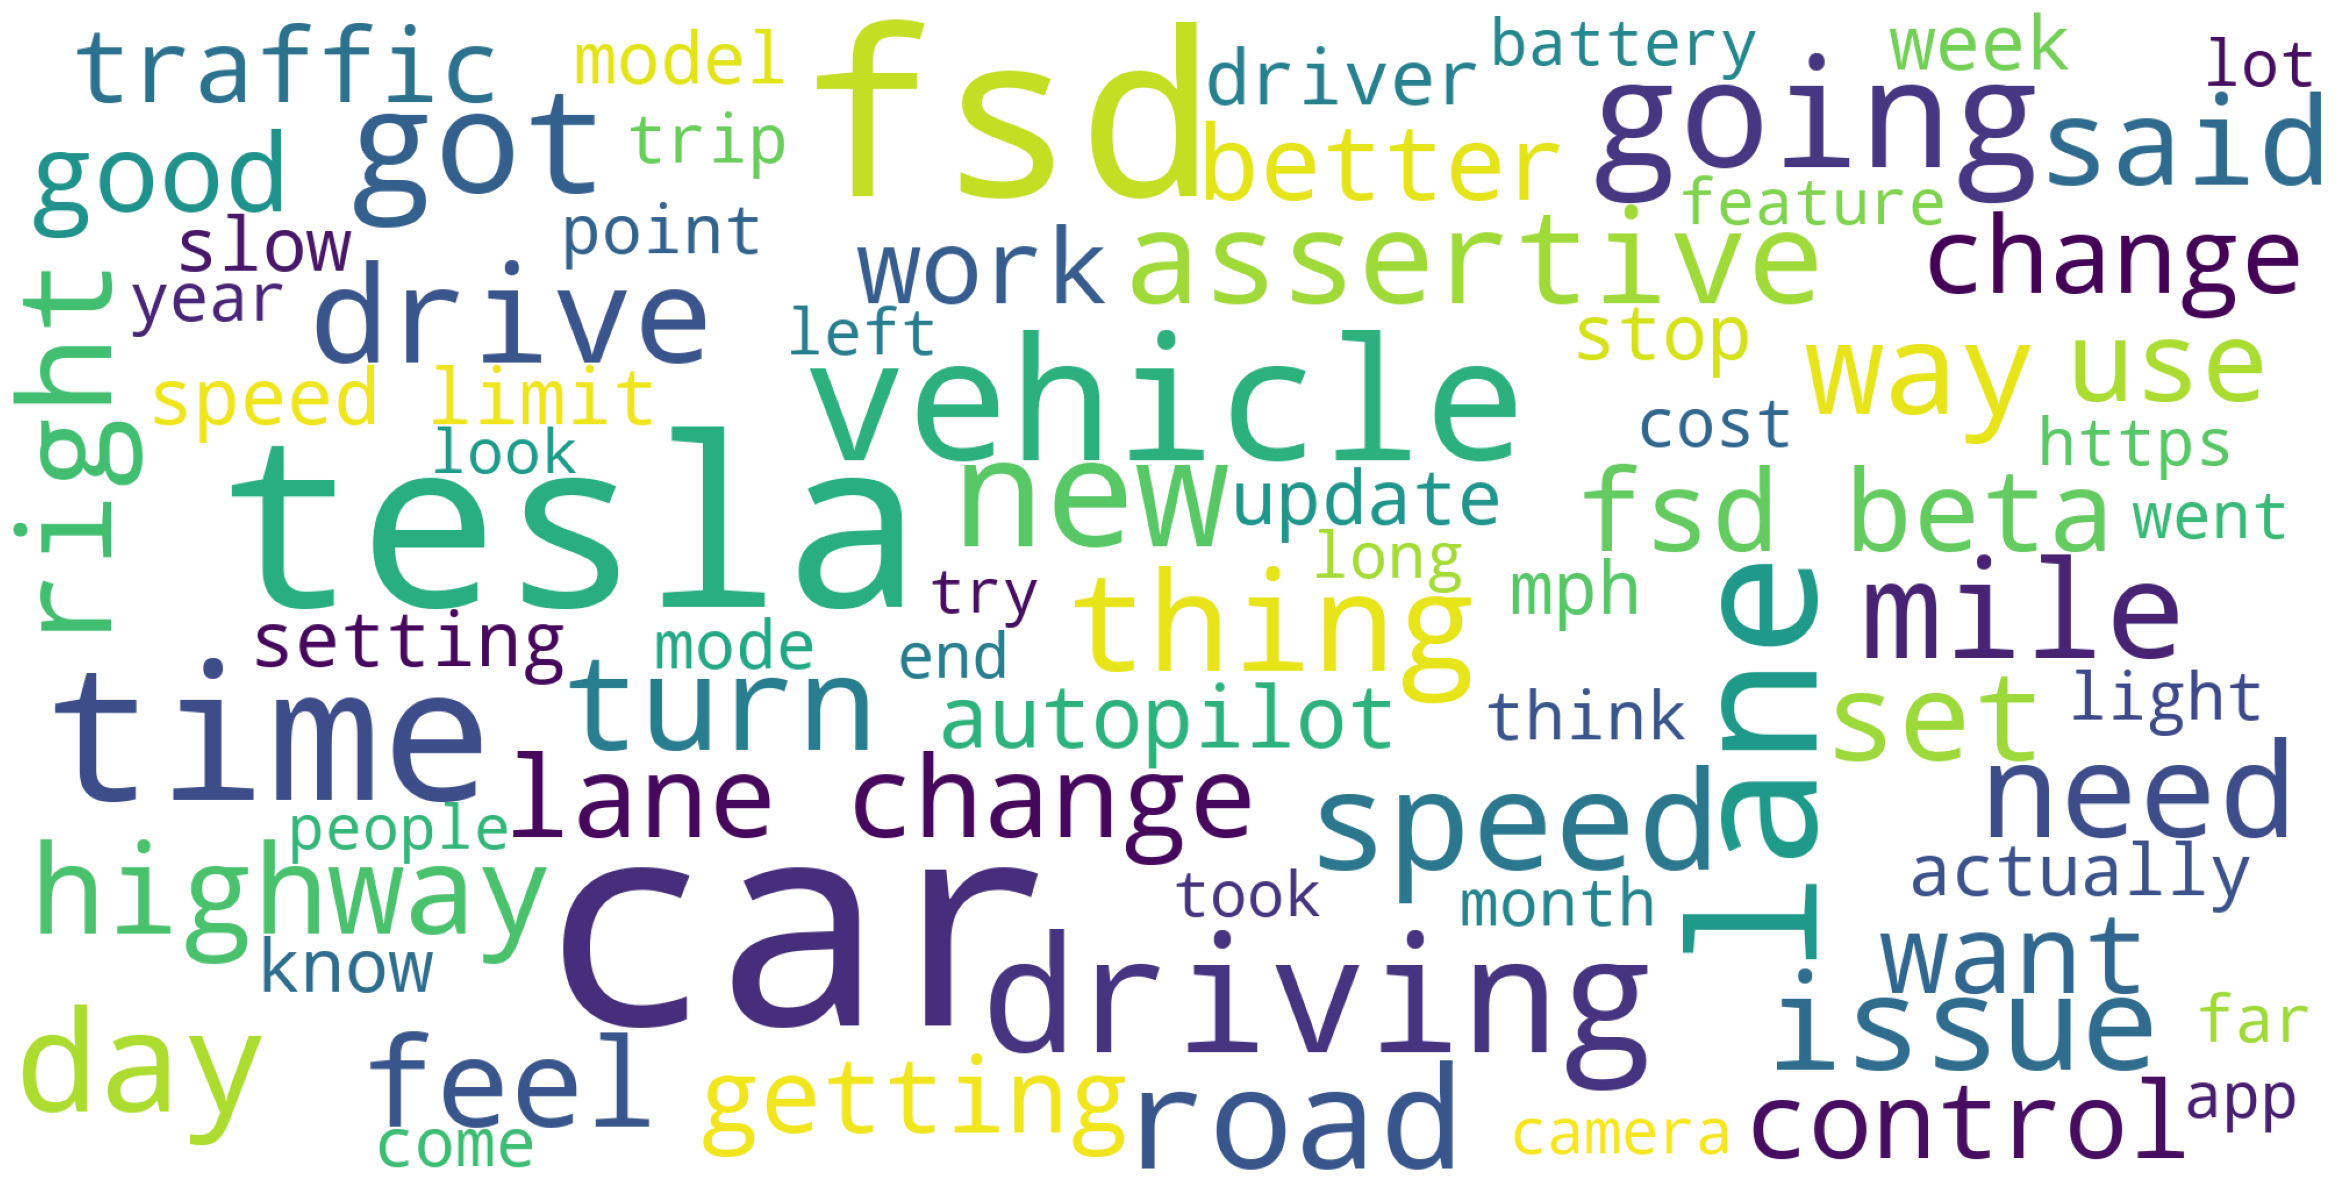

In [114]:
df = pl.read_csv("Posts_Sentences.csv")
df = df.filter(pl.col('sentences').str.contains("assertive"))
text = " ".join(df["sentences"].to_list())
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
text = ' '.join([token.text for token in doc if not token.is_stop])
text = text.lower()

text = re.sub("average assertive", "assertive", text)
text = re.sub("assertively", "assertive", text)
text = re.sub("assertiveness", "assertive", text)
text = re.sub("aggressively", "aggressive", text)
text = re.sub("aggressiveness", "aggressive", text)
#text = re.sub("assertive|chill|average|", "", text)

# Wordcloud settings
wordcloud = WordCloud(width=2000, height=1000, random_state=3, max_words=75, background_color="white", prefer_horizontal=.99, max_font_size=250, min_font_size=50)
# Process words and generate wordcloud
wc_dict = wordcloud.process_text(text)
wordcloud = wordcloud.generate_from_frequencies(wc_dict)

# Plot figure and save
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud" + "_posts" +".png", bbox_inches='tight')

In [94]:
words = list(wc_dict.keys())
freq = list(wc_dict.values())
wc_df = pl.DataFrame({"word": words, "freq": freq}).sort("freq", descending=True)

In [115]:
wc_df.write_csv("Post_WC.csv")

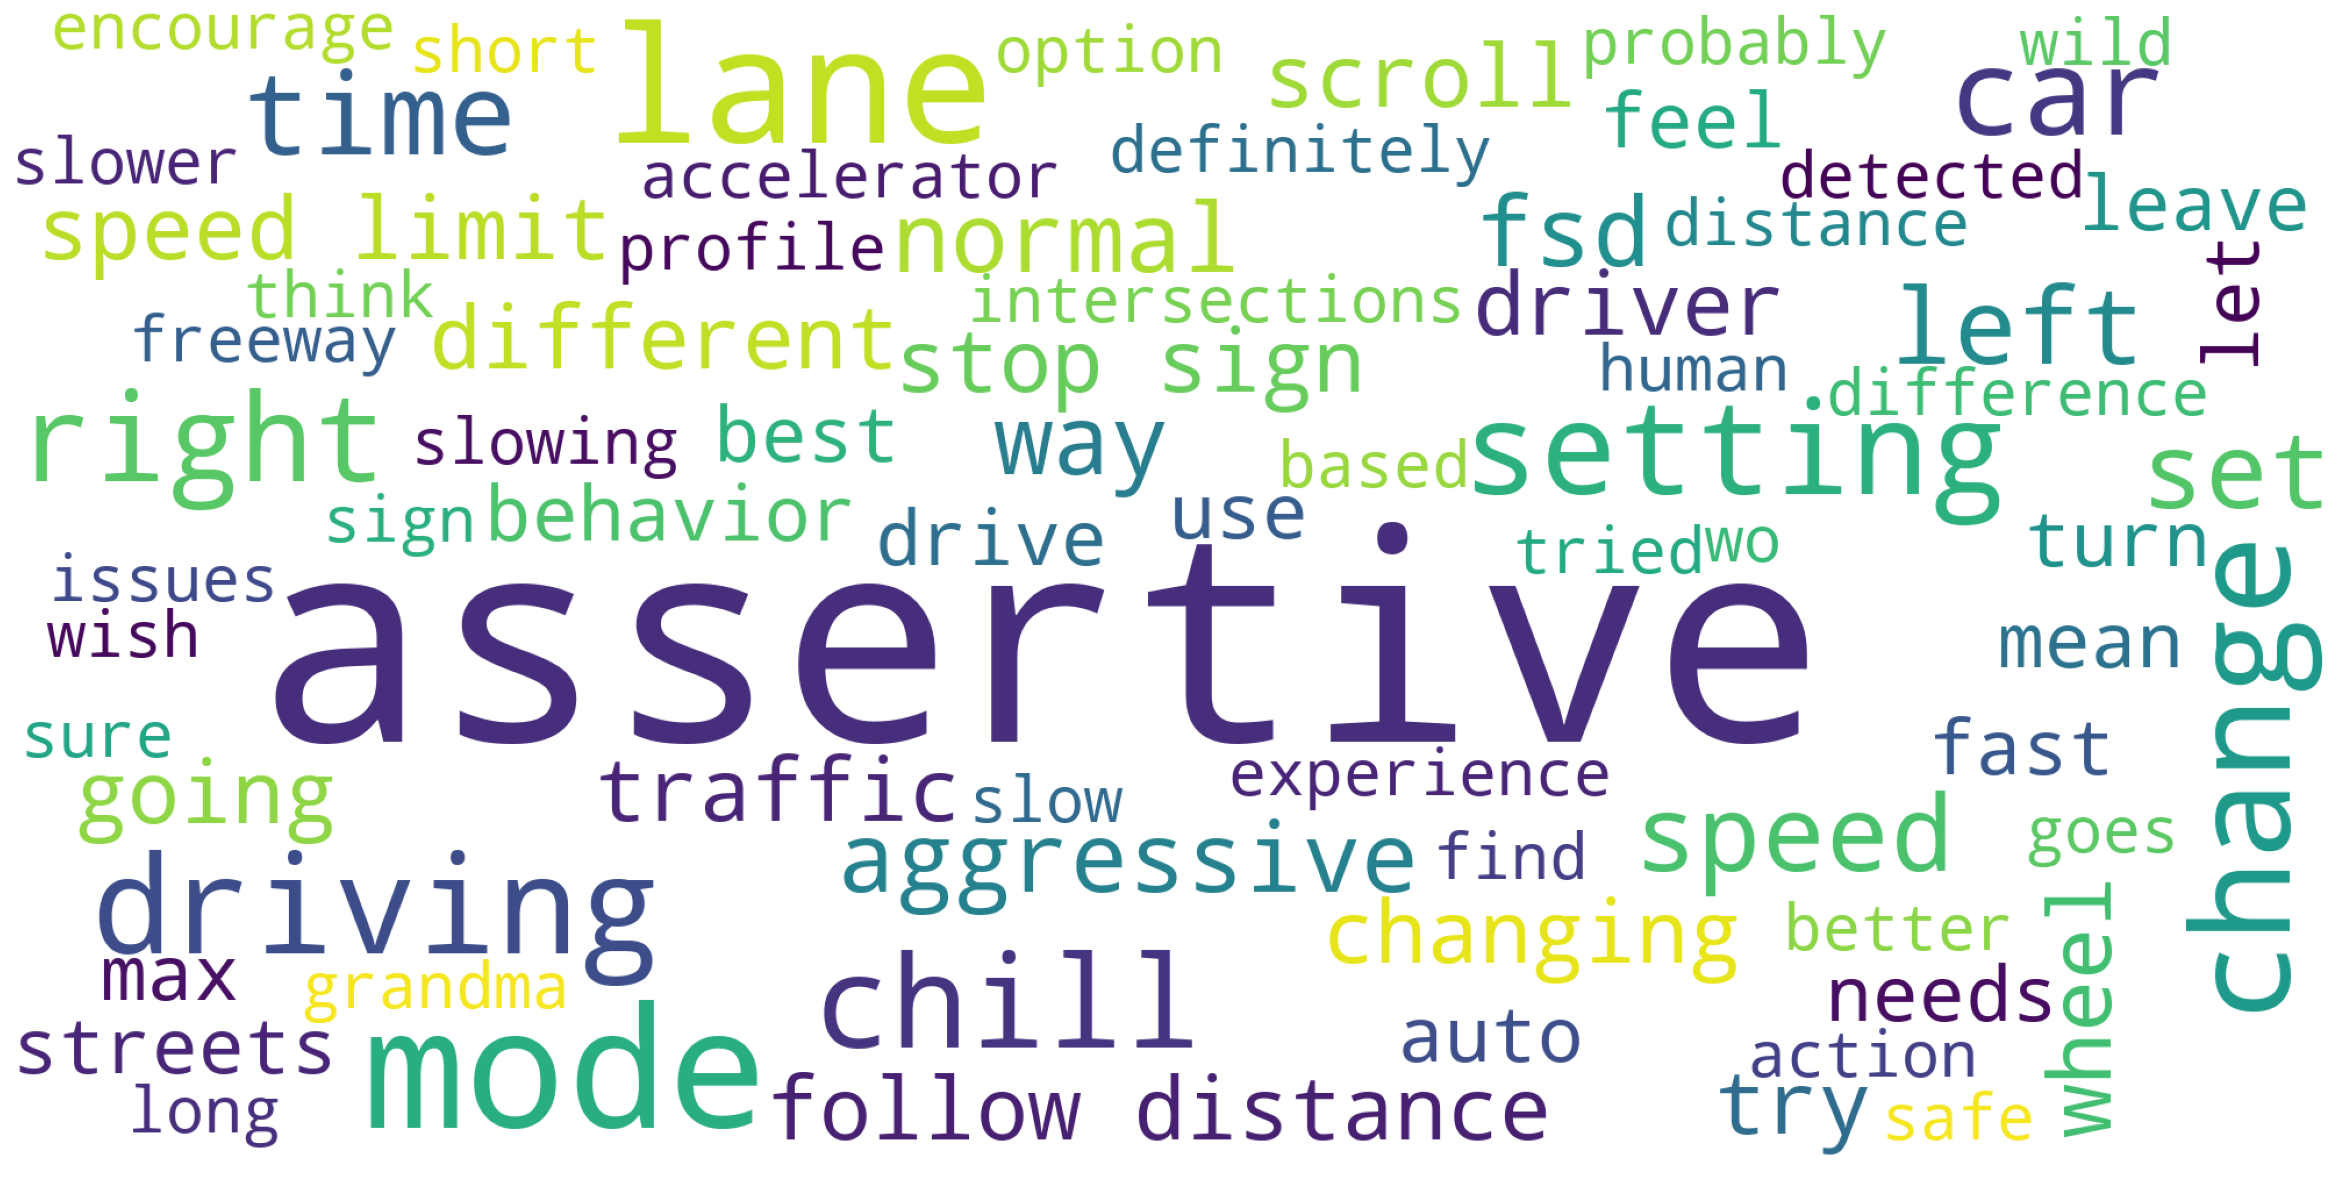

In [107]:
df = pl.read_csv("Comments.csv")
df = df.filter(pl.col('sentence').str.contains("assertive"))

df.write_csv("Comments_Assertive.csv")
text = " ".join(df["sentence"].to_list())
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
text = ' '.join([token.text for token in doc if not token.is_stop])
text = text.lower()

text = re.sub("average assertive", "assertive", text)
text = re.sub("assertively", "assertive", text)
text = re.sub("assertiveness", "assertive", text)
text = re.sub("aggressively", "aggressive", text)
text = re.sub("aggressiveness", "aggressive", text)
#text = re.sub("assertive|chill|average|", "", text)

# Wordcloud settings
wordcloud = WordCloud(width=2000, height=1000, random_state=3, max_words=75, background_color="white", prefer_horizontal=.99, max_font_size=250, min_font_size=50)
# Process words and generate wordcloud
wc_dict = wordcloud.process_text(text)
wordcloud = wordcloud.generate_from_frequencies(wc_dict)

# Plot figure and save
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud" + "_comments" +".png", bbox_inches='tight')

In [103]:
words = list(wc_dict.keys())
freq = list(wc_dict.values())
wc_comm = pl.DataFrame({"word": words, "freq": freq}).sort("freq", descending=True)

In [116]:
wc_comm.write_csv("Comments_WC.csv")

In [110]:
df = pl.concat([wc_comm, wc_df]).group_by("word").sum().sort("freq", descending=True)